In [1]:
# Import necessary libraries.

# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Preprocessing allows us to standarsize our data
from sklearn import preprocessing

# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split

# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Neural Network classification algorithm
from sklearn.neural_network import MLPClassifier


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['low', 'med', 'high', 'vhigh']); ax.yaxis.set_ticklabels(['low', 'med', 'high', 'vhigh'])

In [3]:
# Assign the URL of the dataset to filename.

filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [4]:
# Create a list of column names.

headers = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class_dist"]

In [5]:
# Using panda method to read the data from the URL link and add the column names into the pandas dataframe.

df = pd.read_csv(filename, names = headers)

In [6]:
# Using head() method, to show the first 5 rows of the dataframe.

df.head()

,buying,maint,doors,persons,lug_boot,safety,class_dist
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
# Check and confirm that there is no missing data in the dataframe.

df.isnull().sum()

buying        0
maint         0
doors         0
persons       0
lug_boot      0
safety        0
class_dist    0
dtype: int64

In [8]:
print(df.shape)
print(df.dtypes)

(1728, 7)
buying        object
maint         object
doors         object
persons       object
lug_boot      object
safety        object
class_dist    object
dtype: object


In [9]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class_dist
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


In [10]:
df['buying'].replace(to_replace=['low', 'med', 'high', 'vhigh'], value=[0,1,2,3],inplace=True)

df['maint'].replace(to_replace=['low', 'med', 'high', 'vhigh'], value=[0,1,2,3],inplace=True)

df['doors'].replace(to_replace=['2','3','4','5more'], value=[0,1,2,3],inplace=True)

# df['persons'].replace(to_replace=['2','4','more'], value=[0,1,2],inplace=True)

df['lug_boot'].replace(to_replace=['small','med', 'big'], value=[0,1,2],inplace=True)

df['safety'].replace(to_replace=['low', 'med', 'high'], value=[0,1,2],inplace=True)

df['class_dist'].replace(to_replace=['unacc', 'acc', 'good', 'vgood'], value=[0,1,2,3],inplace=True)

df.drop('persons', axis=1, inplace=True)

df.head()

,buying,maint,doors,lug_boot,safety,class_dist
0,3,3,0,0,0,0
1,3,3,0,0,1,0
2,3,3,0,0,2,0
3,3,3,0,1,0,0
4,3,3,0,1,1,0


In [11]:
# Check the data types.
df.dtypes

buying        int64
maint         int64
doors         int64
lug_boot      int64
safety        int64
class_dist    int64
dtype: object

In [12]:
df['doors'] = df['doors'].astype(np.int64)

In [13]:
# Check the data types again.
df.dtypes

buying        int64
maint         int64
doors         int64
lug_boot      int64
safety        int64
class_dist    int64
dtype: object

In [14]:
X = df[['maint', 'doors', 'lug_boot', 'safety', 'class_dist']]
Y = df['buying']

In [15]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [16]:
# Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)


print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (1209, 5) (1209,)
Test set: (519, 5) (519,)


In [17]:
# Decision Tree

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [n for n in range(1,21)],
     'max_features': ['auto', 'sqrt', 'log2'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

Tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy : 0.30764462809917353
Accuracy (on the test data) : 0.27360308285163776


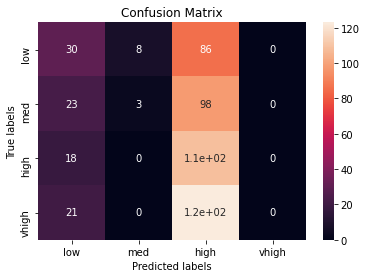

In [18]:
print("Tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("Accuracy :",tree_cv.best_score_)

print("Accuracy (on the test data) :",tree_cv.score(X_test, Y_test))

yhat_dt=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_dt)

In [19]:
# Logistic Regression

parameters ={'C':[0.01,0.1,1],
             'penalty':['none', 'l2', 'l1', 'elasticnet'],
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

lr = LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv = 10)
logreg_cv.fit(X_train, Y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='non

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='non

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 453, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score o

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1],
                         'penalty': ['none', 'l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

Tuned hyperparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.3176239669421487
Accuracy (on the test data) : 0.3063583815028902


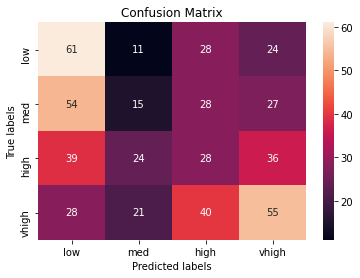

In [20]:
print("Tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("Accuracy :", logreg_cv.best_score_)

print("Accuracy (on the test data) :",logreg_cv.score(X_test, Y_test))

yhat_lr=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_lr)

In [21]:
# Neural Network

parameters ={'activation':['identity', 'logistic', 'tanh', 'relu'],
             'solver':['lbfgs', 'sgd', 'adam']}

mlp = MLPClassifier()

mlp_cv = GridSearchCV(mlp, parameters, cv = 10)
mlp_cv.fit(X_train, Y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1027, in fit
    return self._fit(X, y, incremental=(self.warm_start and
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 375, in _fit
    self._fit_lbfgs(X, y, activations, deltas, coef_grads,
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\ASUS\a

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1027, in fit
    return self._fit(X, y, incremental=(self.warm_start and
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 375, in _fit
    self._fit_lbfgs(X, y, activations, deltas, coef_grads,
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\ASUS\a

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1027, in fit
    return self._fit(X, y, incremental=(self.warm_start and
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 375, in _fit
    self._fit_lbfgs(X, y, activations, deltas, coef_grads,
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\ASUS\a

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1027, in fit
    return self._fit(X, y, incremental=(self.warm_start and
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 375, in _fit
    self._fit_lbfgs(X, y, activations, deltas, coef_grads,
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\ASUS\a

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 1027, in fit
    return self._fit(X, y, incremental=(self.warm_start and
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 375, in _fit
    self._fit_lbfgs(X, y, activations, deltas, coef_grads,
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 471, in _fit_lbfgs
    self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
  File "C:\Users\ASUS\a

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

Tuned hyperparameters :(best parameters)  {'activation': 'identity', 'solver': 'lbfgs'}
Accuracy : 0.31679063360881543
Accuracy (on the test data) : 0.30828516377649323


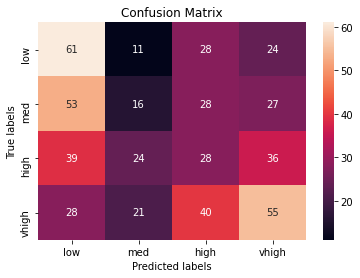

In [22]:
print("Tuned hyperparameters :(best parameters) ", mlp_cv.best_params_)
print("Accuracy :", mlp_cv.best_score_)

print("Accuracy (on the test data) :",mlp_cv.score(X_test, Y_test))

yhat_mlp=mlp_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_mlp)

                     Best Score  Accuracy (on test data)
Decision Tree             0.308                    0.274
Logistic Regression       0.318                    0.306
Neural Network            0.317                    0.308
The model with the highest score is Logistic Regression.
The model with the highest accuracy values is Neural Network.


Text(0, 0.5, 'Accuracy')

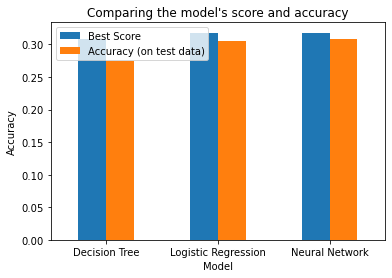

In [39]:
result_data = pd.DataFrame(data = {
    'Best Score' : [round(tree_cv.best_score_, 3), round(logreg_cv.best_score_, 3), round(mlp_cv.best_score_, 3)],
    'Accuracy (on test data)' : [round(tree_cv.score(X_test, Y_test), 3), round(logreg_cv.score(X_test, Y_test), 3), round(mlp_cv.score(X_test, Y_test), 3)],
    }, 
    index = ['Decision Tree', 'Logistic Regression', 'Neural Network'],
    columns = ['Best Score', 'Accuracy (on test data)']
)

print(result_data)
print("The model with the highest score is Logistic Regression.")
print("The model with the highest accuracy values is Neural Network.")

result_data.plot(kind="bar")
plt.title("Comparing the model's score and accuracy")
plt.xticks(rotation=0, ha='center')
plt.xlabel("Model")
plt.ylabel("Accuracy")

Based on the given the parameters:

| Parameters                            | Values  | Index  | Remarks                                     |
| ------------------------------------- | ------- | ------ | ------------------------------------------- |
| Buying price (buying)                 | ?       | ?      | 'low': 0, 'med': 1, 'high': 2, 'vhigh': 3  |
| Price of the maintenance (maint)      | High    | 2      | 'low': 0, 'med': 1, 'high': 2, 'vhigh': 3  |
| Number of doors (doors)               | 4       | 2      | '2': 0, '3': 1, '4': 2, '5more': 3        |
| Size of luggage boot (lug_boot)       | Big     | 2      | 'small': 0, 'med': 1, 'big': 2               |
| Estimated safety of the car (safety)  | High    | 2      | 'low': 0, 'med': 1, 'high': 2              |
| Class Distribution (class_dist)       | Good    | 2      | 'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3  |


In [25]:
predicted_para = np.array([2, 2, 2, 2, 2]).reshape(1,-1)
print(predicted_para)

[[2 2 2 2 2]]


In [26]:
# price_dt = tree_cv.predict(predicted_para)
# price_dt

In [30]:
price_lr = logreg_cv.predict(predicted_para)
price_lr

array([1], dtype=int64)

In [28]:
price_nn = mlp_cv.predict(predicted_para)
price_nn

array([1], dtype=int64)

In [40]:
print('From the 2 models, the predicted index of the buying price is [1], the predicted buying price is medium.')

From the 2 models, the predicted index of the buying price is [1], the predicted buying price is medium.
